EDA — Google Analytics Transactions
Fuente: data_sample.parquet
Descripción: Datos de transacciones de Google Analytics con información de productos, sesiones, dispositivos, geografía y comportamiento de usuarios.

Objetivo de este notebook

Cargar y entender la estructura del dataset.
Evaluar calidad de datos (faltantes, duplicados, tipos).
Analizar distribuciones univariadas (numéricas y categóricas).
Observar relaciones básicas (correlaciones y cruces clave).
Dejar un resumen ejecutable y reutilizable para modelado o análisis posterior.

In [1]:
# ==============
# IMPORTS & CONFIG
# ==============
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

pd.set_option("display.max_columns", 120)
pd.set_option("display.width", 140)

# Ruta del archivo (ajusta si corres el notebook en otra ubicación)
PARQUET_PATH = Path('../data/raw/data_sample.parquet')

print('📦 Archivo esperado:', PARQUET_PATH)

📦 Archivo esperado: ..\data\raw\data_sample.parquet


In [3]:
# === Leer Parquet:===
#
# !pip -q install pyarrow en caso no tenga

# Leer Parquet (usa pyarrow por defecto en Colab)
df = pd.read_parquet("../data/raw/data_sample.parquet")

# Mostrar resultados
display(df.head())  # primeros 5 registros
print(f"Filas: {df.shape[0]}, Columnas: {df.shape[1]}")

,transaction_date,parsed_date,transaction_id,transaction_revenue_usd,transaction_tax_usd,transaction_shipping_usd,transaction_affiliation,currency_code,product_sku,product_name,product_category,product_brand,product_variant,product_quantity,product_price_usd,product_revenue_usd,is_impression,is_click,promo_id,promo_name,promo_creative,promo_position,visitor_id,session_id,session_number,session_start_time,total_visits,total_hits,total_pageviews,time_on_site_seconds,bounces,new_visits,traffic_source,traffic_medium,campaign,keyword,ad_content,referral_path,is_true_direct,channel_grouping,browser,browser_version,operating_system,os_version,is_mobile,mobile_device_brand,mobile_device_model,device_category,device_language,screen_resolution,continent,sub_continent,country,region,metro,city,network_domain,adwords_campaign_id,adwords_adgroup_id,adwords_creative_id,adwords_criteria_id,gclid,ad_network_type,hit_number,hit_time_ms,hit_hour,hit_minute,is_interaction,is_entrance,is_exit,referer,page_path,hostname,page_title,entrance_page_path,exit_page_path,social_engagement_type
0,20170801,2017-08-01,ORD201708011814,NaN,NaN,NaN,Google Merchandise Store,USD,GGOEGAEJ028013,Google Women's Short Sleeve Hero Tee Grey,Apparel,(not set),SM,NaN,5.10,NaN,None,None,None,None,None,None,0509972280802528263,1501621191,4,1501621191,1,5,5,56.0,NaN,NaN,(direct),(none),(not set),None,None,None,None,Display,Chrome,not available in demo dataset,Macintosh,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,desktop,not available in demo dataset,not available in demo dataset,Americas,Northern America,United States,California,San Francisco-Oakland-San Jose CA,Mountain View,(not set),NaN,NaN,NaN,NaN,None,None,5,55994,14,0,True,None,True,None,/ordercompleted.html,shop.googlemerchandisestore.com,Checkout Confirmation,None,/ordercompleted.html,Not Socially Engaged
1,20170801,2017-08-01,ORD201708011814,40.29,8.82,11.0,Google Merchandise Store,USD,GGOEGAEJ028013,Google Women's Short Sleeve Hero Tee Grey,Apparel,(not set),SM,2.0,5.10,11.45,None,None,None,None,None,None,0509972280802528263,1501621191,4,1501621191,1,5,5,56.0,NaN,NaN,(direct),(none),(not set),None,None,None,None,Display,Chrome,not available in demo dataset,Macintosh,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,desktop,not available in demo dataset,not available in demo dataset,Americas,Northern America,United States,California,San Francisco-Oakland-San Jose CA,Mountain View,(not set),NaN,NaN,NaN,NaN,None,None,4,55993,14,0,True,None,None,None,/ordercompleted.html,shop.googlemerchandisestore.com,Checkout Confirmation,None,/ordercompleted.html,Not Socially Engaged
2,20170801,2017-08-01,ORD201708011814,NaN,NaN,NaN,Google Merchandise Store,USD,GGOEGALB034113,Google Women's Vintage Hero Tee Black,Apparel,(not set),SM,NaN,5.70,NaN,None,None,None,None,None,None,0509972280802528263,1501621191,4,1501621191,1,5,5,56.0,NaN,NaN,(direct),(none),(not set),None,None,None,None,Display,Chrome,not available in demo dataset,Macintosh,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,desktop,not available in demo dataset,not available in demo dataset,Americas,Northern America,United States,California,San Francisco-Oakland-San Jose CA,Mountain View,(not set),NaN,NaN,NaN,NaN,None,None,5,55994,14,0,True,None,True,None,/ordercompleted.html,shop.googlemerchandisestore.com,Checkout Confirmation,None,/ordercompleted.html,Not Socially Engaged
3,20170801,2017-08-01,ORD201708011814,40.29,8.82,11.0,Google Merchandise Store,USD,GGOEGALB034113,Google Women's Vintage Hero Tee Black,Apparel,(not set),SM,2.0,5.70,12.65,None,None,None,None,None,None,0509972280802528263,1501621191,4,1501621191,1,5,5,56.0,NaN,NaN,(direct),(none),(not set),None,None,None,None,Display,Chrome,not available in demo dataset,Macintosh,not available in demo dataset,False,not available in demo dataset,not available in demo dataset

Filas: 74457, Columnas: 77


In [5]:
# ========================
# ESTRUCTURA & ESTADÍSTICOS
# ========================
print("\nInformación general del dataset:")
df.info()

print("\nEstadísticas descriptivas numéricas:")
display(df.describe())

print("\nEstadísticas categóricas (conteos/top):")
display(df.describe(include=['object', 'category']))

# Identificación de tipos
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
dt_cols = df.select_dtypes(include=['datetime64[ns]', 'datetime64[ns, UTC]']).columns.tolist()

print(f"\nColumnas numéricas ({len(numeric_cols)}):", numeric_cols[:20], '...' if len(numeric_cols)>20 else '')
print(f"Columnas categóricas ({len(cat_cols)}):", cat_cols[:20], '...' if len(cat_cols)>20 else '')
print(f"Columnas datetime ({len(dt_cols)}):", dt_cols)


Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74457 entries, 0 to 74456
Data columns (total 77 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   transaction_date          74457 non-null  object 
 1   parsed_date               74457 non-null  object 
 2   transaction_id            74457 non-null  object 
 3   transaction_revenue_usd   36744 non-null  float64
 4   transaction_tax_usd       25581 non-null  float64
 5   transaction_shipping_usd  36580 non-null  float64
 6   transaction_affiliation   74457 non-null  object 
 7   currency_code             74457 non-null  object 
 8   product_sku               74457 non-null  object 
 9   product_name              74457 non-null  object 
 10  product_category          74457 non-null  object 
 11  product_brand             74457 non-null  object 
 12  product_variant           74457 non-null  object 
 13  product_quantity          3

,transaction_revenue_usd,transaction_tax_usd,transaction_shipping_usd,product_quantity,product_price_usd,product_revenue_usd,session_id,session_number,session_start_time,total_visits,total_hits,total_pageviews,time_on_site_seconds,bounces,new_visits,adwords_campaign_id,adwords_adgroup_id,adwords_creative_id,adwords_criteria_id,hit_number,hit_time_ms,hit_hour,hit_minute
count,36744.000000,25581.000000,36580.000000,36818.000000,74457.000000,36818.000000,7.445700e+04,74457.000000,7.445700e+04,74457.0,74457.000000,74457.000000,74439.000000,0.0,25663.0,0.0,0.0,0.0,0.0,74457.000000,7.445700e+04,74457.000000,74457.000000
mean,287.388543,22.767936,22.977237,6.413955,16.629624,47.315090,1.485686e+09,5.257195,1.485686e+09,1.0,55.834535,41.826571,1442.149505,NaN,1.0,NaN,NaN,NaN,NaN,50.918947,1.301840e+06,12.816498,30.120781
std,1028.358260,31.563780,51.020311,25.597807,18.680915,159.042538,9.543476e+06,17.357087,9.543475e+06,0.0,55.116021,42.389063,1340.053709,NaN,0.0,NaN,NaN,NaN,NaN,43.281128,1.129644e+06,4.817902,17.053834
min,1.200000,1.260000,7.000000,1.000000,0.790000,0.895263,1.470046e+09,1.000000,1.470046e+09,1.0,2.000000,2.000000,9.000000,NaN,1.0,NaN,NaN,NaN,NaN,1.000000,0.000000e+00,0.000000,0.000000
25%,46.960000,8.950000,10.000000,1.000000,3.990000,11.666666,1.477427e+09,1.000000,1.477427e+09,1.0,26.000000,21.000000,614.000000,NaN,1.0,NaN,NaN,NaN,NaN,24.000000,5.740900e+05,9.000000,16.000000
50%,96.900000,13.110000,13.000000,1.000000,13.290000,19.571666,1.485377e+09,2.000000,1.485377e+09,1.0,42.000000,32.000000,1045.000000,NaN,1.0,NaN,NaN,NaN,NaN,40.000000,9.759760e+05,12.000000,30.000000
75%,230.870000,24.290000,15.500000,3.000000,18.990000,41.590000,1.494011e+09,5.000000,1.494011e+09,1.0,66.000000,48.000000,1809.000000,NaN,1.0,NaN,NaN,NaN,NaN,63.000000,1.654684e+06,16.000000,45.000000
max,23952.560000,763.140000,1138.740000,1000.000000,250.000000,9496.000000,1.501652e+09,315.000000,1.501652e+09,1.0,500.000000,469.000000,15047.000000,NaN,1.0,NaN,NaN,NaN,NaN,490.000000,1.504662e+07,23.000000,59.000000



Estadísticas categóricas (conteos/top):


,transaction_date,parsed_date,transaction_id,transaction_affiliation,currency_code,product_sku,product_name,product_category,product_brand,product_variant,is_impression,is_click,promo_id,promo_name,promo_creative,promo_position,visitor_id,traffic_source,traffic_medium,campaign,keyword,ad_content,referral_path,is_true_direct,channel_grouping,browser,browser_version,operating_system,os_version,mobile_device_brand,mobile_device_model,device_category,device_language,screen_resolution,continent,sub_continent,country,region,metro,city,network_domain,gclid,ad_network_type,is_entrance,is_exit,referer,page_path,hostname,page_title,entrance_page_path,exit_page_path,social_engagement_type
count,74457,74457,74457,74457,74457,74457,74457,74457,74457,74457,0,0,0,0,0,0,74457,74457,74457,74457,15137,894,34406,48198,74457,74457,74457,74457,74457,74457,74457,74457,74457,74457,74457,74457,74457,74457,74457,74457,74457,2854,2832,10,26941,0,74457,74457,74457,22,56761,74457
unique,365,365,11551,1,1,1122,490,21,1,35,0,0,0,0,0,0,10021,40,7,4,27,12,51,1,8,9,1,7,1,1,1,3,1,1,6,19,69,79,46,134,733,441,1,1,1,0,1,1,5,1,1,1
top,20161212,2016-12-12,ORD201703041515,Google Merchandise Store,USD,GGOEGFKQ020399,Google Sunglasses,Apparel,(not set),Single Option Only,NaN,NaN,NaN,NaN,NaN,NaN,1957458976293878100,(direct),(none),(not set),(not provided),Google Merchandise Collection,/,True,Referral,Chrome,not available in demo dataset,Macintosh,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop,not available in demo dataset,not available in demo dataset,Americas,Northern America,United States,not available in demo dataset,not available in demo dataset,not available in demo dataset,(not set),CJ3Ls5Diqs4CFQ6oaQodXegHOA,Google Search,True,True,NaN,/ordercompleted.html,shop.googlemerchandisestore.com,Checkout Confirmation,/ordercompleted.html,/ordercompleted.html,Not Socially Engaged
freq,550,550,146,74457,74457,1590,2756,26276,74457,35178,NaN,NaN,NaN,NaN,NaN,NaN,290,55938,55938,72811,13445,746,32614,48198,33812,68287,74457,40565,74457,74457,74457,69413,74457,74457,72871,71321,69909,30674,30674,30674,41158,56,2832,10,26941,NaN,74457,74457,74441,22,56761,74457



Columnas numéricas (23): ['transaction_revenue_usd', 'transaction_tax_usd', 'transaction_shipping_usd', 'product_quantity', 'product_price_usd', 'product_revenue_usd', 'session_id', 'session_number', 'session_start_time', 'total_visits', 'total_hits', 'total_pageviews', 'time_on_site_seconds', 'bounces', 'new_visits', 'adwords_campaign_id', 'adwords_adgroup_id', 'adwords_creative_id', 'adwords_criteria_id', 'hit_number'] ...
Columnas categóricas (52): ['transaction_date', 'parsed_date', 'transaction_id', 'transaction_affiliation', 'currency_code', 'product_sku', 'product_name', 'product_category', 'product_brand', 'product_variant', 'is_impression', 'is_click', 'promo_id', 'promo_name', 'promo_creative', 'promo_position', 'visitor_id', 'traffic_source', 'traffic_medium', 'campaign'] ...
Columnas datetime (0): []


,missing,missing_pct
promo_creative,74457,100.00
referer,74457,100.00
adwords_adgroup_id,74457,100.00
adwords_creative_id,74457,100.00
adwords_criteria_id,74457,100.00
adwords_campaign_id,74457,100.00
bounces,74457,100.00
promo_position,74457,100.00
is_impression,74457,100.00
is_click,74457,100.00


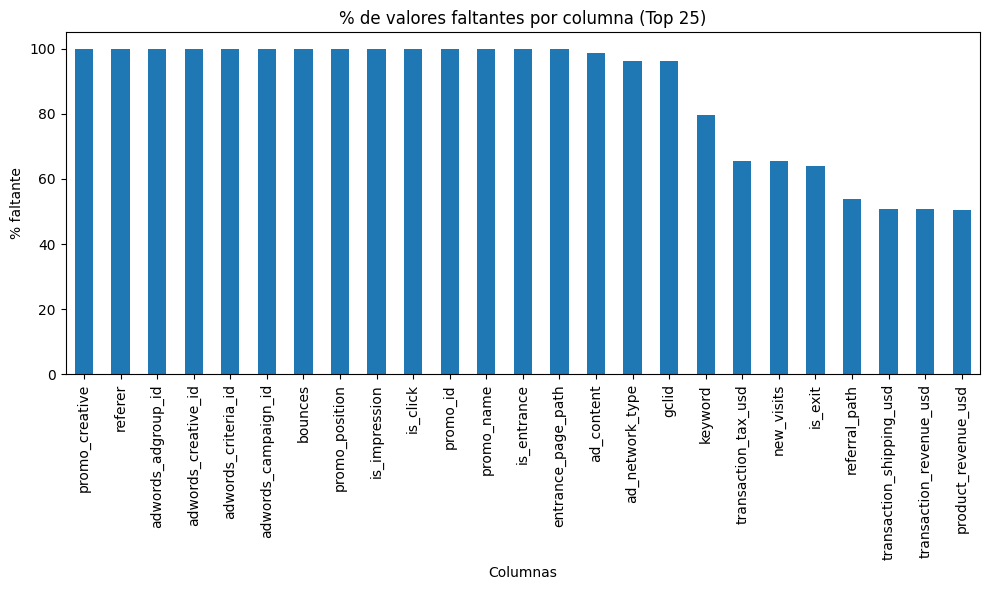

Registros duplicados: 240


In [6]:
# =====================
# CALIDAD: NULOS & DUPS
# =====================
missing = df.isna().sum().sort_values(ascending=False)
missing_pct = (missing / len(df) * 100).round(2)
missing_df = pd.DataFrame({'missing': missing, 'missing_pct': missing_pct})
display(missing_df.head(30))

# Bar chart de % de faltantes (top 25)
topn = 25
to_plot = missing_pct.head(topn)
plt.figure(figsize=(10, 6))
to_plot.plot(kind='bar')
plt.title(f'% de valores faltantes por columna (Top {topn})')
plt.ylabel('% faltante')
plt.xlabel('Columnas')
plt.tight_layout()
plt.show()

# Duplicados
dup_count = df.duplicated().sum()
print(f"Registros duplicados: {dup_count:,}")

Columnas numéricas seleccionadas para histograma: ['session_id', 'session_start_time', 'hit_time_ms', 'time_on_site_seconds', 'transaction_revenue_usd', 'product_revenue_usd']


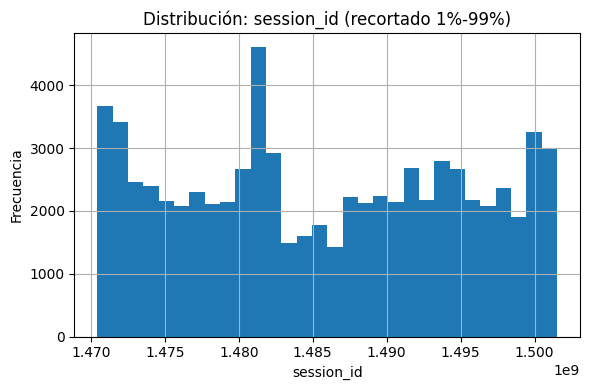

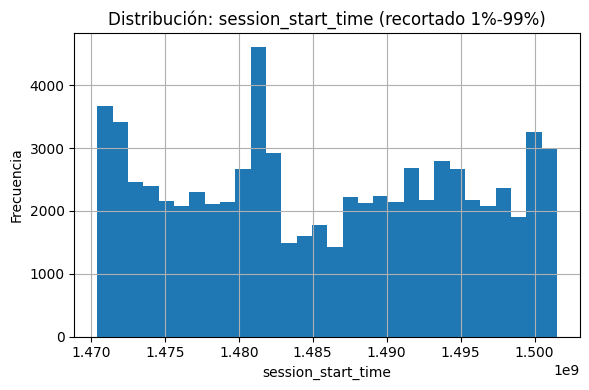

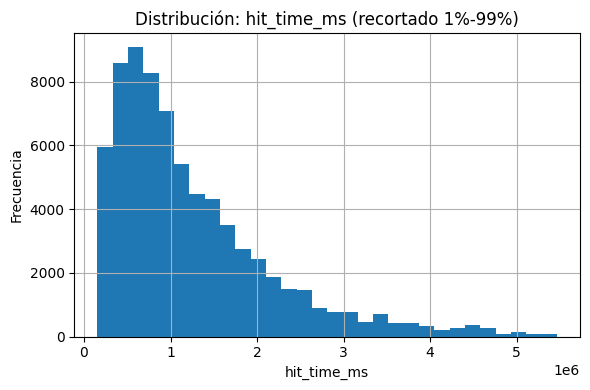

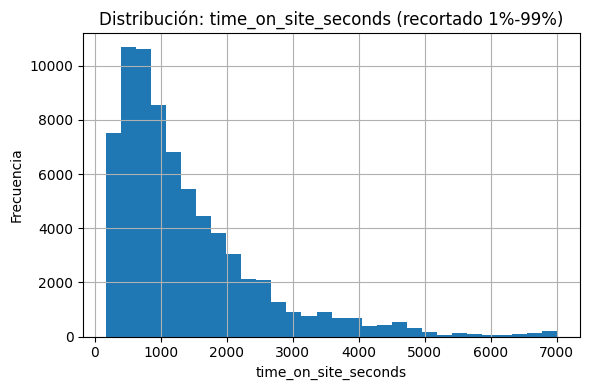

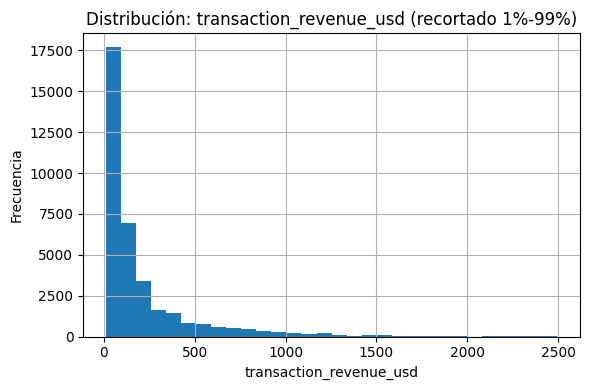

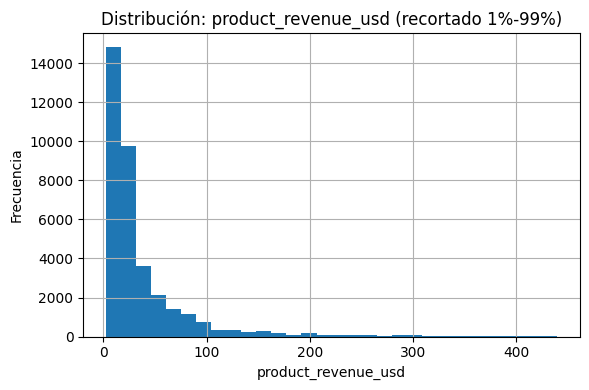

In [8]:
# ==================================
# DISTRIBUCIONES UNIVARIADAS (NUMÉRICAS)
# ==================================
# Selecciona hasta 6 columnas numéricas representativas por varianza
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()

if len(num_cols) == 0:
    print("No hay columnas numéricas para graficar.")
else:
    # Orden por varianza descendente para priorizar variables informativas
    var_order = df[num_cols].var().sort_values(ascending=False).index.tolist()
    sel_num = var_order[:6]
    print("Columnas numéricas seleccionadas para histograma:", sel_num)

    for col in sel_num:
        plt.figure(figsize=(6,4))
        series = df[col].dropna()
        # Evitar problemas si tiene valores infinitos
        series = series.replace([np.inf, -np.inf], np.nan).dropna()
        if series.empty:
            print(f"[skip] {col}: sin datos válidos para histograma.")
            continue
        # Recortar colas extremas si hay outliers muy severos (p99)
        upper = series.quantile(0.99)
        lower = series.quantile(0.01)
        trimmed = series[(series>=lower) & (series<=upper)]
        trimmed.hist(bins=30)
        plt.title(f'Distribución: {col} (recortado 1%-99%)')
        plt.xlabel(col)
        plt.ylabel('Frecuencia')
        plt.tight_layout()
        plt.show()

Columnas categóricas seleccionadas: ['device_category', 'campaign', 'page_title', 'continent', 'operating_system', 'traffic_medium']


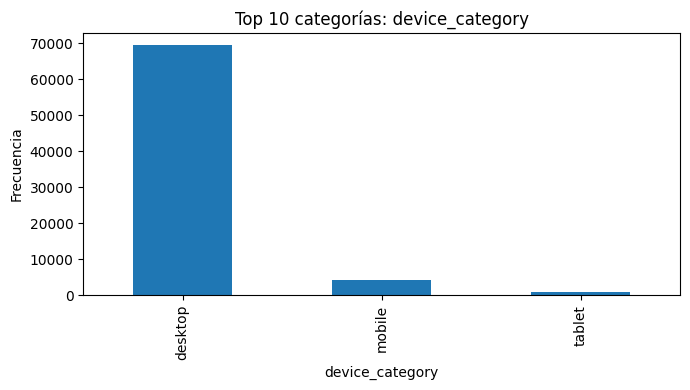

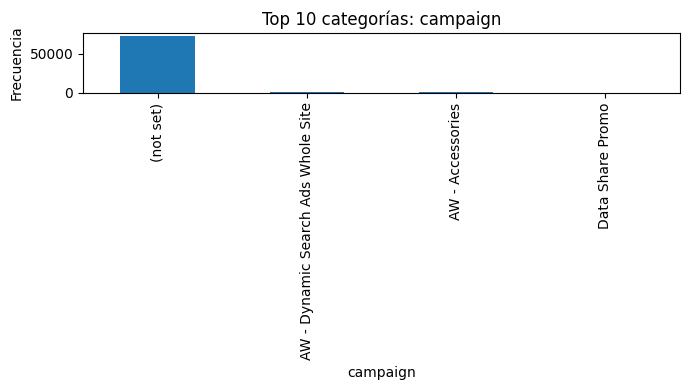

C:\Users\jorge\AppData\Local\Temp\ipykernel_6300\1352257123.py:22: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


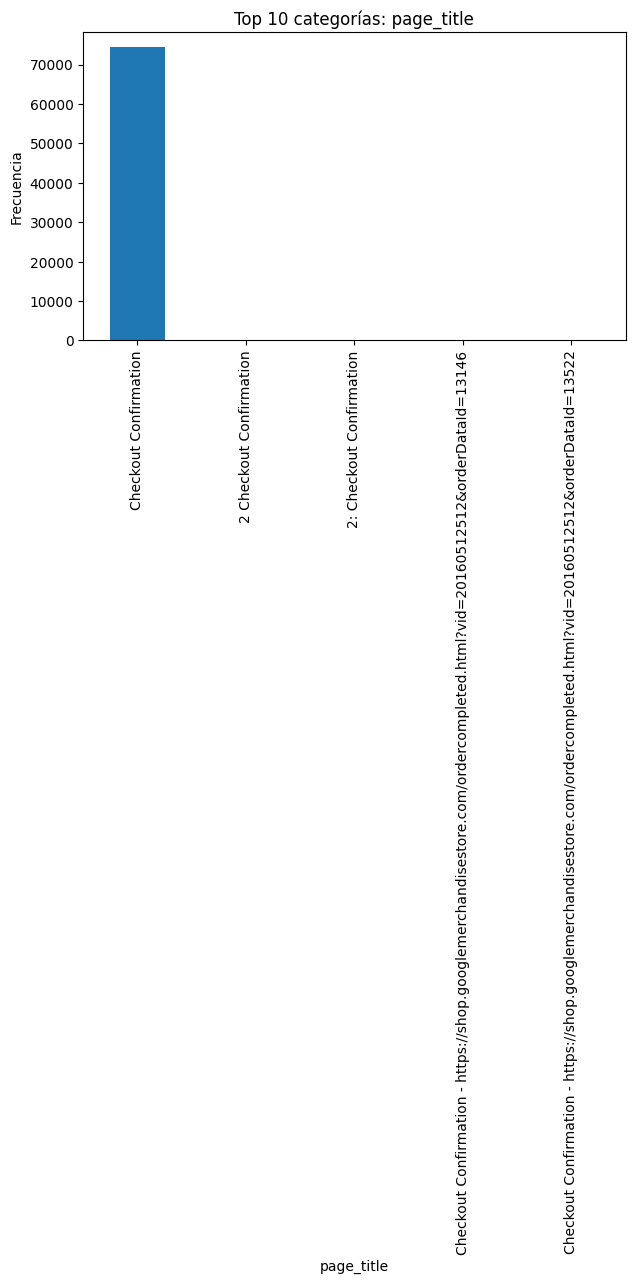

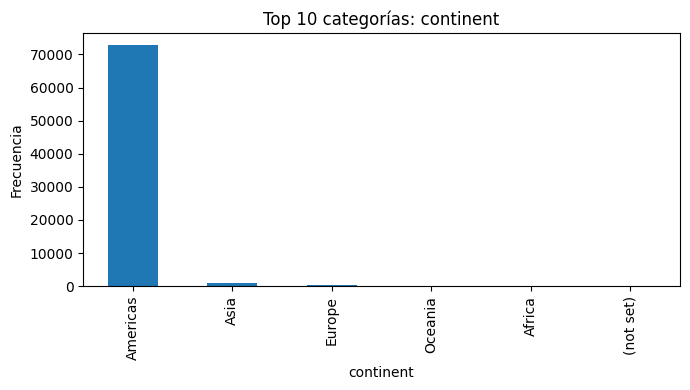

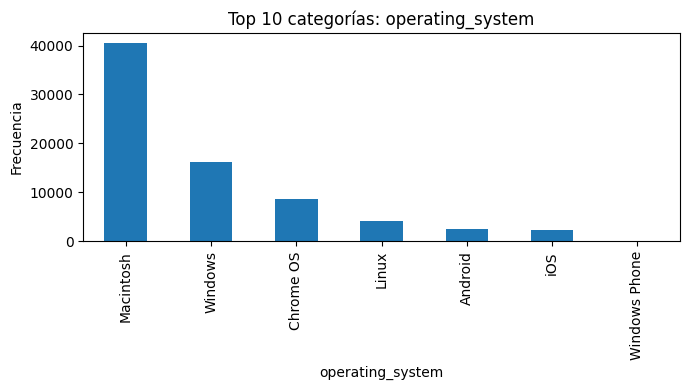

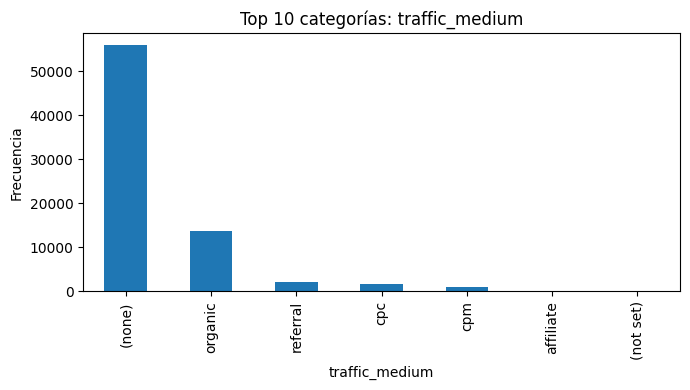

In [9]:
# ====================================
# DISTRIBUCIONES UNIVARIADAS (CATEGÓRICAS)
# ====================================
cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

if len(cat_cols) == 0:
    print("No hay columnas categóricas para graficar.")
else:
    # Preferir columnas con cardinalidad moderada (2 a 50 categorías)
    card = df[cat_cols].nunique().sort_values()
    candidates = [c for c in card.index if 2 <= card[c] <= 50]
    sel_cat = candidates[:6] if len(candidates) > 0 else card.index[:6]
    print("Columnas categóricas seleccionadas:", sel_cat)

    for col in sel_cat:
        plt.figure(figsize=(7,4))
        vc = df[col].astype('object').fillna('Desconocido').value_counts().head(10)
        vc.plot(kind='bar')
        plt.title(f'Top 10 categorías: {col}')
        plt.xlabel(col)
        plt.ylabel('Frecuencia')
        plt.tight_layout()
        plt.show()


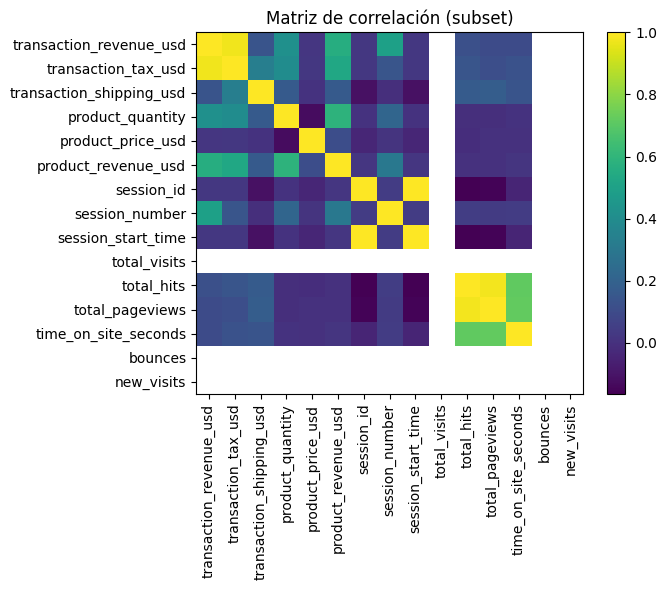

In [10]:
# =========================
# CORRELACIONES (NUMÉRICAS)
# =========================
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
if len(num_cols) < 2:
    print("Insuficientes columnas numéricas para correlación.")
else:
    # Limitar a 15 para legibilidad
    sel = num_cols[:15]
    corr = df[sel].corr()

    plt.figure(figsize=(7,6))
    plt.imshow(corr, interpolation='nearest', aspect='auto')
    plt.title('Matriz de correlación (subset)')
    plt.colorbar()
    plt.xticks(range(len(sel)), sel, rotation=90)
    plt.yticks(range(len(sel)), sel)
    plt.tight_layout()
    plt.show()

Columna temporal detectada: transaction_date


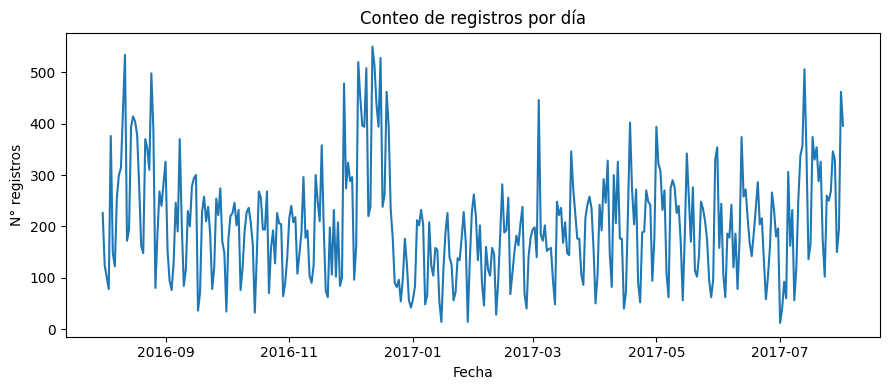

In [13]:
# =======================================
# ANÁLISIS TEMPORAL (SI HAY FECHAS)
# =======================================
# Intento de detección de una columna de fecha usada comúnmente
date_candidates = [c for c in df.columns if 'date' in c.lower() or 'time' in c.lower()]
parsed = None

for c in date_candidates:
    try:
        ser = pd.to_datetime(df[c], errors='coerce', utc=True).dropna()
        if not ser.empty:
            parsed = c
            break
    except Exception:
        pass

if parsed:
    print(f"Columna temporal detectada: {parsed}")
    ts = pd.to_datetime(df[parsed], errors='coerce')
    gb = df.groupby(ts.dt.to_period('D')).size().sort_index()
    idx = gb.index.to_timestamp()
    plt.figure(figsize=(9,4))
    plt.plot(idx, gb.values)
    plt.title('Conteo de registros por día')
    plt.xlabel('Fecha')
    plt.ylabel('N° registros')
    plt.tight_layout()
    plt.show()
else:
    print("No se detectó columna temporal usable para serie de tiempo.")


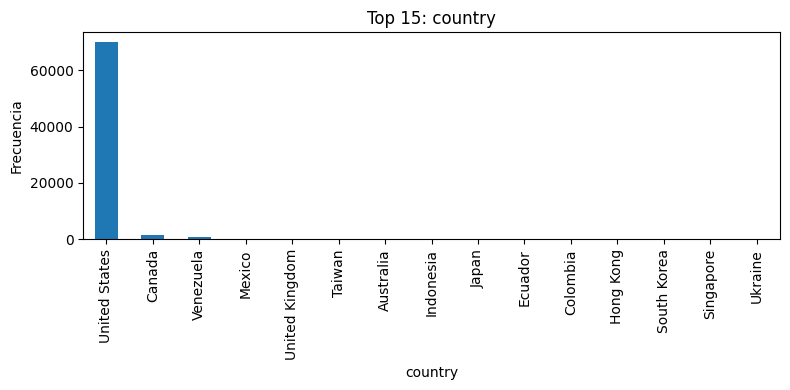

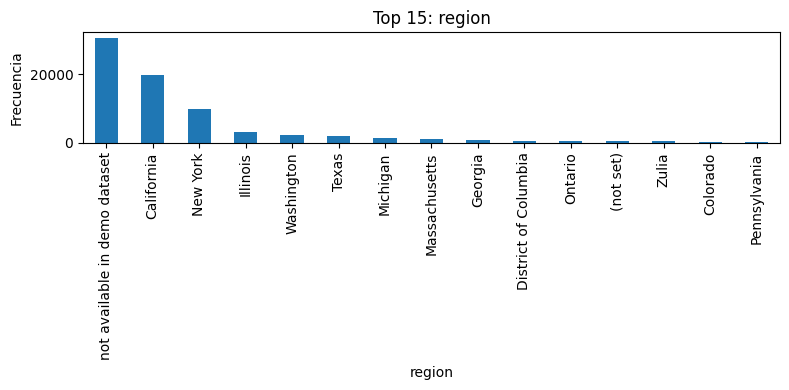

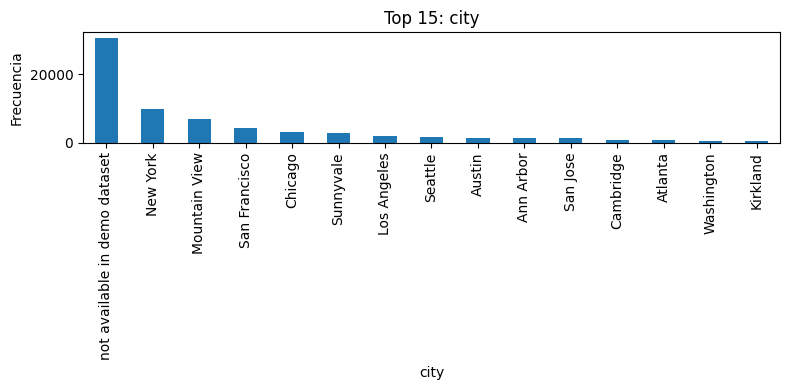

In [14]:
# =======================================
# DISTRIBUCIÓN GEOGRÁFICA (BÁSICA)
# =======================================
geo_cols = [c for c in df.columns if any(k in c.lower() for k in ['country', 'region', 'city'])]
if geo_cols:
    for col in geo_cols[:3]:
        vc = df[col].astype('object').fillna('Desconocido').value_counts().head(15)
        plt.figure(figsize=(8,4))
        vc.plot(kind='bar')
        plt.title(f'Top 15: {col}')
        plt.xlabel(col)
        plt.ylabel('Frecuencia')
        plt.tight_layout()
        plt.show()
else:
    print("No se encontraron columnas geográficas típicas (country/region/city).")

In [17]:
# ===================
# RESUMEN & NEXT STEPS
# ===================
rows, cols = df.shape
null_cols = (df.isna().sum() > 0).sum()
dups = df.duplicated().sum()

print("### Resumen rápido")
print(f"- Filas: {rows:,} | Columnas: {cols:,}")
print(f"- Columnas con faltantes: {null_cols}/{cols}")
print(f"- Registros duplicados: {dups:,}")

# Análisis detallado de tipos de datos
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
dt_cols = df.select_dtypes(include=['datetime64[ns]', 'datetime64[ns, UTC]']).columns.tolist()
bool_cols = df.select_dtypes(include=['bool']).columns.tolist()

print(f"- Numéricas: {len(numeric_cols)} | Categóricas: {len(cat_cols)} | Fecha: {len(dt_cols)} | Booleanas: {len(bool_cols)}")

# Verificar si hay otros tipos
all_classified = set(numeric_cols + cat_cols + dt_cols + bool_cols)
total_cols = set(df.columns)
unclassified = total_cols - all_classified

if unclassified:
    print(f"- Columnas no clasificadas: {len(unclassified)}")
    print(f"  Nombres: {list(unclassified)}")
    print("  Tipos de datos de estas columnas:")
    for col in unclassified:
        print(f"    {col}: {df[col].dtype}")

# Verificación de la suma
total_classified = len(numeric_cols) + len(cat_cols) + len(dt_cols) + len(bool_cols) + len(unclassified)
print(f"\n✅ Verificación: {total_classified} columnas clasificadas = {cols} columnas totales")

### Resumen rápido
- Filas: 74,457 | Columnas: 77
- Columnas con faltantes: 29/77
- Registros duplicados: 240
- Numéricas: 23 | Categóricas: 52 | Fecha: 0 | Booleanas: 2

✅ Verificación: 77 columnas clasificadas = 77 columnas totales


--------------------------------------------------VALIDACION GROUP 04-----------------------------------------------------------------------

# Pipeline E2E de Validación — Cleaning → Aggregation → Preprocessing (Grupo 04)

Este notebook valida la calidad de los datos procesados y prueba las funciones implementadas en:
- `src/preprocess/cleaning.py`
- `src/preprocess/aggregation.py`
- `src/preprocess/preprocessing.py`

Checklist de esta ejecución:
- [ ] Cargar raw y ejecutar todas las funciones de cleaning, guardando parquet/csv limpios
- [ ] Leer limpio y ejecutar aggregation (marca x día) + KPIs + calendario
- [ ] Probar utilidades de preprocessing: selección de serie, ARIMA/Prophet/ML/LSTM/SARIMAX
- [ ] Mostrar métricas de calidad y formas intermedias

Nota: este notebook asume que el archivo raw existe en `../data/raw/data_sample.parquet` (desde `notebooks/`).


In [1]:
# ===============
# SETUP & IMPORTS
# ===============
import sys
from pathlib import Path
import pandas as pd
import numpy as np

# Asegurar que src/ esté en el path
ROOT = Path('..').resolve()
SRC = ROOT / 'src'
if str(SRC) not in sys.path:
    sys.path.append(str(SRC))

# Forzar recarga de módulos para reflejar cambios recientes en src/
import importlib
import preprocess.cleaning as _cleaning_mod
import preprocess.aggregation as _aggregation_mod
import preprocess.preprocessing as _preprocessing_mod
importlib.reload(_cleaning_mod)
importlib.reload(_aggregation_mod)
importlib.reload(_preprocessing_mod)

from preprocess.cleaning import (
    CleaningConfig,
    run_cleaning,
    load_raw,
    normalize_strings_and_placeholders,
    parse_dates,
    normalize_brand,
    drop_high_missing_columns,
    drop_all_missing_rows,
    coerce_types,
    drop_duplicates,
    negatives_to_nan,
    impute_missing,
    handle_outliers,
    drop_constant_cols,
    reduce_categoricals_cardinality,
    DataQualityReport,
)

from preprocess.aggregation import (
    calculate_day_brand_aggregation,
    generate_day_brand_grouped_data_files,   
)
from preprocess.preprocessing import (
    TSConfig,
    TimeSeriesPreprocessor,
)

RAW = ROOT / 'data' / 'raw' / 'data_sample.parquet'
CLEAN_PARQUET = ROOT / 'data' / 'raw' / 'data_sample_cleaned_group04.parquet'
BRAND_DAILY_PARQUET = ROOT / 'data' / 'raw' / 'brand_daily_group04.parquet'

print('ROOT:', ROOT)
print('RAW exists:', RAW.exists())

ROOT: C:\ProyectoParcialGrupo4\pc1_20252_metodologia_data_science
RAW exists: True


In [2]:
# ============================
# 1) CLEANING — Paso a paso (proteger parsed_date y product_brand)
# ============================

cfg_clean = CleaningConfig(
    raw_path=str(RAW),
    out_parquet=str(CLEAN_PARQUET),
    out_csv=str(CLEAN_PARQUET).replace('.parquet', '.csv'),
    persist=True,
    # Para columnas con alto % de nulos: imputar (num->media, cat->moda)
    drop_columns_missing_action='impute',
)

# Cargar raw
raw_df = load_raw(cfg_clean)
print('Raw shape:', raw_df.shape)

# Reporte de calidad acumulado
report = DataQualityReport()

# 1) Normalizar strings/placeholders
step_df = normalize_strings_and_placeholders(raw_df, cfg_clean)
print('After normalize_strings:', step_df.shape)

# 2) Parseo de fechas -> crea 'parsed_date' si hay candidata
step_df = parse_dates(step_df, cfg_clean)
print("Has 'parsed_date'?:", 'parsed_date' in step_df.columns)

# 3) Normalizar marca (si falta -> Unknown) y crear columna canónica 'product_brand'
step_df = normalize_brand(step_df, cfg_clean, report)
# Fallback robusto por si el kernel tiene una versión antigua del módulo
if 'product_brand' not in step_df.columns:
    for cand in ['product_brand','productBrand','brand','Brand','product_brand_name']:
        if cand in step_df.columns:
            step_df['product_brand'] = step_df[cand].astype('object')
            break
    else:
        step_df['product_brand'] = 'Unknown'
print("Has 'product_brand'?:", 'product_brand' in step_df.columns)

# 4) Gestionar columnas con muchos nulos (imputación configurada) — respeta columnas protegidas
step_df = drop_high_missing_columns(step_df, cfg_clean, report)
print('High-missing handled. Dropped:', report.dropped_columns_missing, '| Imputed:', getattr(report, 'imputed_columns_high_missing', []))

# 5) Drop filas completamente nulas
step_df = drop_all_missing_rows(step_df, cfg_clean, report)
print('Dropped all-missing rows:', report.dropped_rows_all_missing)

# 6) Coerción de tipos
step_df = coerce_types(step_df, cfg_clean)

# 7) Duplicados
step_df = drop_duplicates(step_df, cfg_clean, report)
print('Duplicates dropped:', report.duplicate_rows_dropped)

# 8) Negativos -> NaN
step_df = negatives_to_nan(step_df, cfg_clean, report)
print('Negatives→NaN cols:', report.negatives_to_nan_cols)

# 9) Imputación
step_df = impute_missing(step_df, cfg_clean)

# 10) Winsorize (outliers)
step_df = handle_outliers(step_df, cfg_clean, report)
print('Winsorized cols:', report.winsorized_cols[:8], '...')

# 11) Columnas constantes (respeta columnas protegidas)
step_df = drop_constant_cols(step_df, cfg_clean, report)
print('Constant cols dropped:', report.constant_cols_dropped)

# 12) Reducir cardinalidad (categorías raras -> 'Otros') — no afecta columnas protegidas
step_df = reduce_categoricals_cardinality(step_df, cfg_clean)

# Sanity check: la marca y fecha deben existir para el pipeline Día/Marca
assert 'product_brand' in step_df.columns, "ERROR: product_brand fue eliminada"
assert 'parsed_date' in step_df.columns, "ERROR: parsed_date no existe; verifica columnas de fecha en raw o CleaningConfig.date_candidates"

# Persistir y cerrar reporte
report.n_rows_before, report.n_cols_before = raw_df.shape
report.n_rows_after, report.n_cols_after = step_df.shape
print('Cleaned shape:', step_df.shape)

# Guardar
step_df.to_parquet(cfg_clean.out_parquet, index=False)
print('Saved parquet:', CLEAN_PARQUET.exists())

# Vista rápida
display(step_df.head())
display(report.to_frame())

# Ver todas las columnas restantes
import pandas as pd
pd.set_option("display.max_columns", None)
pd.set_option("display.width", 220)
print(f"✅ Columnas finales ({step_df.shape[1]}):")
print(list(step_df.columns))

Raw shape: (74457, 77)
After normalize_strings: (74457, 77)
Has 'parsed_date'?: True
Has 'product_brand'?: True


C:\ProyectoParcialGrupo4\pc1_20252_metodologia_data_science\src\preprocess\cleaning.py:285: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  out[c] = ser.fillna(fillv)


High-missing handled. Dropped: [] | Imputed: ['is_impression', 'is_click', 'promo_id', 'promo_name', 'promo_creative', 'promo_position', 'bounces', 'campaign', 'keyword', 'ad_content', 'adwords_campaign_id', 'adwords_adgroup_id', 'adwords_creative_id', 'adwords_criteria_id', 'gclid', 'ad_network_type', 'is_entrance', 'referer', 'entrance_page_path']
Dropped all-missing rows: 0
Duplicates dropped: 240
Negatives→NaN cols: []


C:\ProyectoParcialGrupo4\pc1_20252_metodologia_data_science\src\preprocess\cleaning.py:355: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  out[c] = out[c].fillna(fillv)


Winsorized cols: ['transaction_revenue_usd', 'transaction_tax_usd', 'transaction_shipping_usd', 'product_quantity', 'product_price_usd', 'product_revenue_usd', 'visitor_id', 'session_id'] ...
Constant cols dropped: ['transaction_affiliation', 'currency_code', 'is_impression', 'is_click', 'promo_id', 'promo_name', 'promo_creative', 'promo_position', 'total_visits', 'bounces', 'new_visits', 'is_true_direct', 'browser_version', 'os_version', 'mobile_device_brand', 'mobile_device_model', 'device_language', 'screen_resolution', 'adwords_campaign_id', 'adwords_adgroup_id', 'adwords_creative_id', 'adwords_criteria_id', 'ad_network_type', 'is_interaction', 'is_entrance', 'is_exit', 'referer', 'page_path', 'hostname', 'entrance_page_path', 'exit_page_path', 'social_engagement_type']
Cleaned shape: (74217, 45)
Saved parquet: True


,transaction_date,parsed_date,transaction_id,transaction_revenue_usd,transaction_tax_usd,transaction_shipping_usd,product_sku,product_name,product_category,product_brand,...,region,metro,city,network_domain,gclid,hit_number,hit_time_ms,hit_hour,hit_minute,page_title
0,20170801,2017-08-01 00:00:00+00:00,ORD201708011814,96.32,13.11,13.0,GGOEGAEJ028013,Google Women's Short Sleeve Hero Tee Grey,Apparel,(not set),...,California,San Francisco-Oakland-San Jose CA,Mountain View,comcast.net,CJ3Ls5Diqs4CFQ6oaQodXegHOA,8,155519,14,0,Checkout Confirmation
1,20170801,2017-08-01 00:00:00+00:00,ORD201708011814,40.29,8.82,11.0,GGOEGAEJ028013,Google Women's Short Sleeve Hero Tee Grey,Apparel,(not set),...,California,San Francisco-Oakland-San Jose CA,Mountain View,comcast.net,CJ3Ls5Diqs4CFQ6oaQodXegHOA,8,155519,14,0,Checkout Confirmation
2,20170801,2017-08-01 00:00:00+00:00,ORD201708011814,96.32,13.11,13.0,GGOEGALB034113,Google Women's Vintage Hero Tee Black,Apparel,(not set),...,California,San Francisco-Oakland-San Jose CA,Mountain View,comcast.net,CJ3Ls5Diqs4CFQ6oaQodXegHOA,8,155519,14,0,Checkout Confirmation
3,20170801,2017-08-01 00:00:00+00:00,ORD201708011814,40.29,8.82,11.0,GGOEGALB034113,Google Women's Vintage Hero Tee Black,Apparel,(not set),...,California,San Francisco-Oakland-San Jose CA,Mountain View,comcast.net,CJ3Ls5Diqs4CFQ6oaQodXegHOA,8,155519,14,0,Checkout Confirmation
4,20170801,2017-08-01 00:00:00+00:00,ORD201708011814,96.32,13.11,13.0,GGOEGOCB017499,Leatherette Journal,Office,(not set),...,California,San Francisco-Oakland-San Jose CA,Mountain View,comcast.net,CJ3Ls5Diqs4CFQ6oaQodXegHOA,8,155519,14,0,Checkout Confirmation


,n_rows_before,n_cols_before,n_rows_after,n_cols_after,dropped_columns_missing,dropped_rows_all_missing,duplicate_rows_dropped,negatives_to_nan_cols,winsorized_cols,constant_cols_dropped,brand_unknown_rows
0,74457,77,74217,45,[],0,240,[],"[transaction_revenue_usd, transaction_tax_usd,...","[transaction_affiliation, currency_code, is_im...",0


✅ Columnas finales (45):
['transaction_date', 'parsed_date', 'transaction_id', 'transaction_revenue_usd', 'transaction_tax_usd', 'transaction_shipping_usd', 'product_sku', 'product_name', 'product_category', 'product_brand', 'product_variant', 'product_quantity', 'product_price_usd', 'product_revenue_usd', 'visitor_id', 'session_id', 'session_number', 'session_start_time', 'total_hits', 'total_pageviews', 'time_on_site_seconds', 'traffic_source', 'traffic_medium', 'campaign', 'keyword', 'ad_content', 'referral_path', 'channel_grouping', 'browser', 'operating_system', 'is_mobile', 'device_category', 'continent', 'sub_continent', 'country', 'region', 'metro', 'city', 'network_domain', 'gclid', 'hit_number', 'hit_time_ms', 'hit_hour', 'hit_minute', 'page_title']


In [3]:
# ============================
# 2) AGGREGATION — Marca x Día
# ============================

import importlib
import pandas as pd
from pathlib import Path

# Importar SIEMPRE el módulo actual (recarga para evitar versiones viejas en memoria)
import preprocess.aggregation as aggmod
aggmod = importlib.reload(aggmod)

# Rutas (asumimos que ya tienes estas variables definidas en tu notebook)
IN_PARQUET  = str(CLEAN_PARQUET)        # parquet limpio que viene de cleaning
OUT_PARQUET = str(BRAND_DAILY_PARQUET)  # parquet agregado día/marca de salida

print("Using cleaned input:", IN_PARQUET)
print("Saving to          :", OUT_PARQUET)

# -------------------------------------------------------------
# 1) Probar calculate_day_brand_aggregation directamente (en memoria)
# -------------------------------------------------------------
# Cargar el parquet limpio
df_in = pd.read_parquet(IN_PARQUET)

# Asegurar que exista 'transaction_date' (si sólo tienes 'parsed_date', lo copiamos)
if "transaction_date" not in df_in.columns and "parsed_date" in df_in.columns:
    df_in = df_in.copy()
    df_in["transaction_date"] = df_in["parsed_date"]

# Asegurar que exista 'product_brand'
if "product_brand" not in df_in.columns:
    # Trata de adivinar una columna de marca si el cleaning dejó otro nombre
    candidates = [c for c in df_in.columns if "brand" in c.lower()]
    if candidates:
        df_in = df_in.rename(columns={candidates[0]: "product_brand"})
    else:
        raise ValueError("No se encontró columna 'product_brand' ni ninguna similar en el parquet de entrada.")

# (Opcional) Si quieres contar eventos: metric_col=None
# (Si quieres sumar una métrica, pon el nombre en metric_col, p.ej. 'product_quantity')
metric_col = None  # <-- cambia a 'product_quantity' o similar si quieres suma de métrica

agg_mem = aggmod.calculate_day_brand_aggregation(df_in, metric_col=metric_col)
print("Aggregated (in-memory) shape:", agg_mem.shape)
display(agg_mem.head())

# -------------------------------------------------------------
# 2) Probar generate_day_brand_grouped_data_files (lee y escribe parquet)
# -------------------------------------------------------------
# Usamos la función del módulo que lee desde IN_PARQUET y guarda en OUT_PARQUET
result = aggmod.generate_day_brand_grouped_data_files(
    in_path=IN_PARQUET,
    out_path=OUT_PARQUET,
    metric_col=metric_col
)
print("Writer result:", result, "| Exists:", Path(OUT_PARQUET).exists())

# Cargar lo que se guardó y comparar rápidamente con el cálculo en memoria
agg_disk = pd.read_parquet(OUT_PARQUET)
print("Aggregated (disk)  shape:", agg_disk.shape)

# Orden y columnas iguales para comparar
_cols = sorted(list(set(agg_mem.columns) | set(agg_disk.columns)))
cmp_ok = agg_mem.sort_values(_cols).reset_index(drop=True).equals(
    agg_disk.sort_values(_cols).reset_index(drop=True)
)
print("In-memory == On-disk ?", cmp_ok)

# -------------------------------------------------------------
# 3) Serie de una sola acción (filtrar la marca '(not set)' y dejar serie diaria)
# -------------------------------------------------------------
ONE_BRAND = "(not set)"  # tu única marca para el caso de “serie de una sola acción”
#events = número de registros (interacciones/ventas/sesiones, etc.) en un día para una marca.
#Para serie de una sola acción (una sola marca), usar la columna events agregada por 
#día te da una serie temporal univariada diaria: justo lo que necesitas para 
# “Predicción de performance diaria por marca”.
df_single = agg_disk[agg_disk["product_brand"] == ONE_BRAND].copy()

# Determinar el nombre de la columna de valor (events o sum_<metric>)
value_col = next((c for c in df_single.columns if c.startswith("sum_")), None)
if value_col is None:
    value_col = "events"  # cuando metric_col=None

# Asegurar datetime y set index a fecha
df_single["transaction_date"] = pd.to_datetime(df_single["transaction_date"], utc=True).dt.normalize()
ts = df_single.set_index("transaction_date")[value_col].sort_index()

print(f"\nSingle-action brand: {ONE_BRAND}")
print("Time series length:", len(ts), "| from", ts.index.min(), "to", ts.index.max())
display(ts.head(10))


Using cleaned input: C:\ProyectoParcialGrupo4\pc1_20252_metodologia_data_science\data\raw\data_sample_cleaned_group04.parquet
Saving to          : C:\ProyectoParcialGrupo4\pc1_20252_metodologia_data_science\data\raw\brand_daily_group04.parquet
Aggregated (in-memory) shape: (365, 3)


,transaction_date,product_brand,events
0,2016-08-01 00:00:00+00:00,(not set),208
1,2016-08-02 00:00:00+00:00,(not set),124
2,2016-08-04 00:00:00+00:00,(not set),78
3,2016-08-05 00:00:00+00:00,(not set),376
4,2016-08-06 00:00:00+00:00,(not set),148


Writer result: success | Exists: True
Aggregated (disk)  shape: (365, 3)
In-memory == On-disk ? True

Single-action brand: (not set)
Time series length: 365 | from 2016-08-01 00:00:00+00:00 to 2017-08-01 00:00:00+00:00


transaction_date
2016-08-01 00:00:00+00:00    208
2016-08-02 00:00:00+00:00    124
2016-08-04 00:00:00+00:00     78
2016-08-05 00:00:00+00:00    376
2016-08-06 00:00:00+00:00    148
2016-08-07 00:00:00+00:00    122
2016-08-08 00:00:00+00:00    256
2016-08-09 00:00:00+00:00    300
2016-08-10 00:00:00+00:00    314
2016-08-11 00:00:00+00:00    426
Name: events, dtype: int64

In [4]:
# ============================
# 3) PREPROCESSING — Prueba con brand_daily_group04.parquet
# ============================

from pathlib import Path
import importlib
import pandas as pd

# Recarga por si editaste archivos
import preprocess.preprocessing as _preprocessing_mod
_ = importlib.reload(_preprocessing_mod)
from preprocess.preprocessing import TSConfig, TimeSeriesPreprocessor

# Ruta al parquet agregado
DATA_FOR_MODELS = str(Path('..') / 'data' / 'raw' / 'brand_daily_group04.parquet')

# 1) CONFIG: usa exactamente los nombres del parquet agregado
cfg = TSConfig(
    date_col='transaction_date',   # <- columna de fecha en el parquet agregado
    brand_col='product_brand',     # <- columna de marca
    target_metric='events',        # <- métrica objetivo (conteo diario)
    freq='D',
    fill_missing='zero'
)

prep = TimeSeriesPreprocessor(cfg)

# 2) Cargar datos (debe quedar indexado por fecha)
df_models = prep.load_data(DATA_FOR_MODELS)
print('Model DF shape:', df_models.shape)
print('Index dtype:', type(df_models.index))
print('Columns:', list(df_models.columns))

# 3) Elegir una marca (si sólo tienes "(not set)", será esa)
brand = "(not set)"
if 'product_brand' in df_models.columns:
    # si quieres forzar la única disponible:
    brand = df_models['product_brand'].mode(dropna=True).iloc[0]
print('Brand seleccionada:', brand)

# 4) Construir la serie diaria univariada (y = events)
series = prep.select_brand_series(df_models, brand=brand, metric=cfg.target_metric)
print('Series shape:', series.shape, '| rango:', series.index.min(), '→', series.index.max())
display(series.head(10))

# ============================
# 5) Pruebas de preparación por modelo
# ============================

# ARIMA / SARIMA (si no estacionaria, devolverá la diferenciada)
arima_series = prep.prepare_arima_data(series)
print('ARIMA series len:', len(arima_series))

# Prophet
prophet_df, exog_cols = prep.prepare_prophet_data(series)
print('Prophet df:', prophet_df.shape, '| exog:', exog_cols)
display(prophet_df.head())

# ML (features de lags/rolling, ejemplo de fechas arbitrarias ajusta si tu rango es distinto)
X_tr, y_tr, X_te, y_te = prep.prepare_ml_data(series,
                                              train_start=str(series.index.min().date()),
                                              train_end=str((series.index.min()+pd.Timedelta(days=250)).date()),
                                              test_start=str((series.index.min()+pd.Timedelta(days=251)).date()))
print('ML shapes:', X_tr.shape, y_tr.shape, X_te.shape, y_te.shape)

# LSTM (usa las mismas features que ML; secuencias)
feats = prep.create_features(series).dropna()
Xtr, Xte, ytr, yte = prep.prepare_lstm_data(feats, sequence_length=30)
print('LSTM shapes:', Xtr.shape, Xte.shape, ytr.shape, yte.shape)

# SARIMAX exógenas (ejemplo sin eventos externos)
exog = prep.create_sarimax_exogenous(series, events_periods=[])
print('Exogenous shape:', exog.shape)


Model DF shape: (365, 2)
Index dtype: <class 'pandas.core.indexes.datetimes.DatetimeIndex'>
Columns: ['product_brand', 'events']
Brand seleccionada: (not set)
Series shape: (366,) | rango: 2016-08-01 00:00:00+00:00 → 2017-08-01 00:00:00+00:00


Date
2016-08-01 00:00:00+00:00    208.0
2016-08-02 00:00:00+00:00    124.0
2016-08-03 00:00:00+00:00      0.0
2016-08-04 00:00:00+00:00     78.0
2016-08-05 00:00:00+00:00    376.0
2016-08-06 00:00:00+00:00    148.0
2016-08-07 00:00:00+00:00    122.0
2016-08-08 00:00:00+00:00    256.0
2016-08-09 00:00:00+00:00    300.0
2016-08-10 00:00:00+00:00    314.0
Freq: D, Name: events, dtype: float64

ARIMA series len: 366
Prophet df: (366, 2) | exog: []


,ds,y
0,2016-08-01,208.0
1,2016-08-02,124.0
2,2016-08-03,0.0
3,2016-08-04,78.0
4,2016-08-05,376.0


ML shapes: (151, 27) (151,) (115, 27) (115,)
LSTM shapes: (188, 30, 28) (48, 30, 28) (188,) (48,)
Exogenous shape: (366, 0)
